In [412]:
# Import dependencies and setup

import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(15, 5)

In [413]:
# Load and preview dataset

df = pd.read_csv('./Resources/2019_aus_ev_sales.csv', index_col='year', parse_dates=True)
df

,EV_PHEV,total_vehicles,EV%
year,,,
2019-01-01,6718,1062867,0.600
2018-01-01,2216,1153111,0.200
2017-01-01,2287,1189116,0.190
2016-01-01,1369,1178133,0.120
2015-01-01,1771,1155408,0.150
2014-01-01,1322,1113224,0.120
2013-01-01,293,1136227,0.026
2012-01-01,253,1112030,0.023
2011-01-01,49,1008437,0.005


In [414]:
# Drop total_vehicles + EV% columns, sort by 'year' (index) column (ascending)

df = df[['EV_PHEV']]
df

,EV_PHEV
year,
2019-01-01,6718
2018-01-01,2216
2017-01-01,2287
2016-01-01,1369
2015-01-01,1771
2014-01-01,1322
2013-01-01,293
2012-01-01,253
2011-01-01,49


In [415]:
# Sort by 'year' column (ascending)

df = df.sort_values(by=['year'], ascending=True)
df

,EV_PHEV
year,
2011-01-01,49
2012-01-01,253
2013-01-01,293
2014-01-01,1322
2015-01-01,1771
2016-01-01,1369
2017-01-01,2287
2018-01-01,2216
2019-01-01,6718


In [416]:
# Reset index

ev_sales_df = df.reset_index()
ev_sales_df

,year,EV_PHEV
0,2011-01-01,49
1,2012-01-01,253
2,2013-01-01,293
3,2014-01-01,1322
4,2015-01-01,1771
5,2016-01-01,1369
6,2017-01-01,2287
7,2018-01-01,2216
8,2019-01-01,6718


In [417]:
# Convert 'year' column to datetime

#ev_sales_df['year'] = pd.to_datetime(ev_sales_df['year'], format='%Y')
#ev_sales_df

In [418]:
# Rename columns to 'ds' / 'y' to conform to prophet standards

ev_prophet_df = ev_sales_df.rename(columns={'year':'ds', 'EV_PHEV':'y'})
ev_prophet_df

,ds,y
0,2011-01-01,49
1,2012-01-01,253
2,2013-01-01,293
3,2014-01-01,1322
4,2015-01-01,1771
5,2016-01-01,1369
6,2017-01-01,2287
7,2018-01-01,2216
8,2019-01-01,6718


<AxesSubplot:xlabel='ds'>

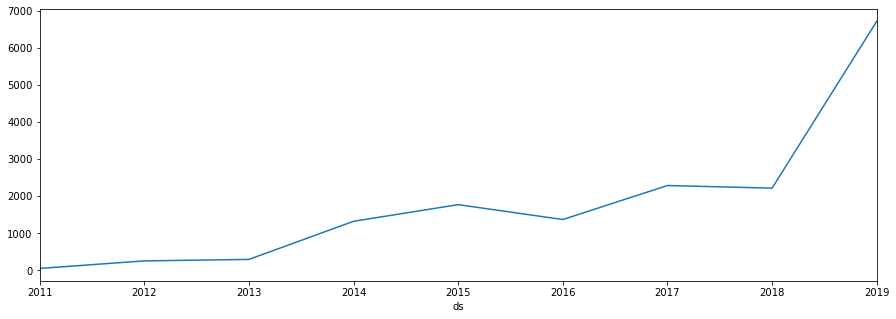

In [419]:
# Set index and preview plot

ev_prophet_df.set_index('ds').y.plot()

In [420]:
# Log-transform data to determine if there's a trend

ev_prophet_df['y'] = np.log(ev_prophet_df['y'])
ev_prophet_df.tail()

,ds,y
4,2015-01-01,7.479300
5,2016-01-01,7.221836
6,2017-01-01,7.734996
7,2018-01-01,7.703459
8,2019-01-01,8.812546


<AxesSubplot:xlabel='ds'>

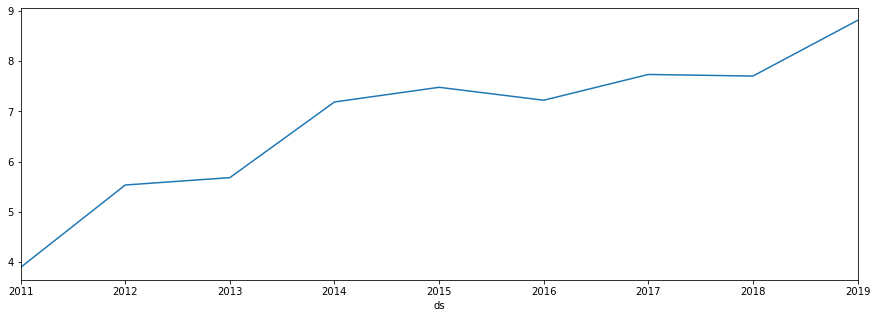

In [421]:
# Plot preview chart to visualise if there's a trend

ev_prophet_df.set_index('ds').y.plot()

In [422]:
# Model data using Prophet

model = Prophet(weekly_seasonality=True, daily_seasonality=True)
model.fit(ev_prophet_df);

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


In [423]:
# Perform forecasting on model

future = model.make_future_dataframe(periods=5, freq = 'y')
future.tail()

,ds
9,2019-12-31
10,2020-12-31
11,2021-12-31
12,2022-12-31
13,2023-12-31


In [424]:
# Forecast and run through Prophet model

forecast = model.predict(future)
forecast.tail()

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
9,2019-12-31,3.603654,9.942361,9.949592,3.599930,3.607162,6.342431,6.342431,6.342431,7.458013,...,0.001142,0.001142,0.001142,-1.116725,-1.116725,-1.116725,0.0,0.0,0.0,9.946085
10,2020-12-31,4.098528,10.650522,10.676227,4.085470,4.111174,6.565052,6.565052,6.565052,7.458013,...,0.643335,0.643335,0.643335,-1.536295,-1.536295,-1.536295,0.0,0.0,0.0,10.663581
11,2021-12-31,4.592050,10.404430,10.453807,4.566159,4.615537,5.838270,5.838270,5.838270,7.458013,...,-0.212346,-0.212346,-0.212346,-1.407396,-1.407396,-1.407396,0.0,0.0,0.0,10.430320
12,2022-12-31,5.085572,10.309687,10.386699,5.045008,5.122021,5.264678,5.264678,5.264678,7.458013,...,-0.926008,-0.926008,-0.926008,-1.267327,-1.267327,-1.267327,0.0,0.0,0.0,10.350250
13,2023-12-31,5.579094,11.943542,12.054457,5.521803,5.632718,6.421739,6.421739,6.421739,7.458013,...,0.080451,0.080451,0.080451,-1.116725,-1.116725,-1.116725,0.0,0.0,0.0,12.000833


In [425]:
# Drop surplus tables

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
9,2019-12-31,9.946085,9.942361,9.949592
10,2020-12-31,10.663581,10.650522,10.676227
11,2021-12-31,10.430320,10.404430,10.453807
12,2022-12-31,10.350250,10.309687,10.386699
13,2023-12-31,12.000833,11.943542,12.054457


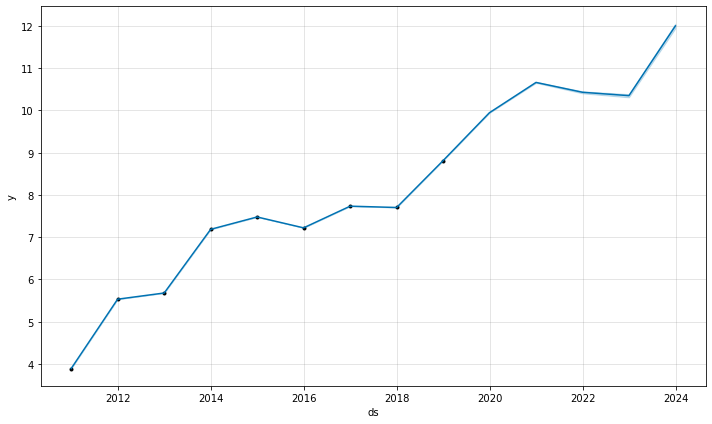

In [428]:
# Plot and preview forecasted results

model.plot(forecast);

In [431]:
# Finalise visualisation
# Ensure both dataframes have the same index 'ds'

ev_prophet_df.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)

In [432]:
# Combine

vis_df = ev_prophet_df.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
vis_df.head()

,y,yhat,yhat_lower,yhat_upper
ds,,,,
2011-01-01,3.891820,3.891820,3.891820,3.891820
2012-01-01,5.533389,5.533389,5.533389,5.533389
2013-01-01,5.680173,5.680173,5.680173,5.680173
2014-01-01,7.186901,7.186901,7.186901,7.186901
2015-01-01,7.479300,7.479300,7.479300,7.479300


In [438]:
# Rescale

vis_df['yhat_rescaled'] = np.exp(vis_df['yhat'])
vis_df.tail()

,y,yhat,yhat_lower,yhat_upper,yhat_rescaled
ds,,,,,
2019-12-31,NaN,9.946085,9.942361,9.949592,20870.347901
2020-12-31,NaN,10.663581,10.650522,10.676227,42769.503416
2021-12-31,NaN,10.430320,10.404430,10.453807,33871.198078
2022-12-31,NaN,10.350250,10.309687,10.386699,31264.863483
2023-12-31,NaN,12.000833,11.943542,12.054457,162890.375136


<AxesSubplot:xlabel='ds'>

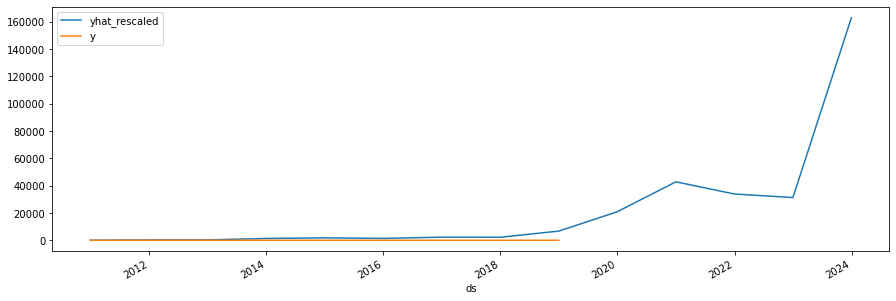

In [435]:
# Preview 'EV_PHEV' and 'yhat_rescaled'

vis_df[['yhat_rescaled', 'y']].plot()

In [410]:
# Confirm time series of both dataframes

ev_sales_df.index = pd.to_datetime(ev_sales_df.index) #make sure our index as a datetime object
connect_date = ev_sales_df.index[-2] #select the 2nd to last date

In [411]:
# Mask forecast data

mask = (forecast.index > connect_date)
predict_df = forecast.loc[mask]

TypeError: '>' not supported between instances of 'numpy.ndarray' and 'Timestamp'